In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# plot arrows with color
# ref: https://stackoverflow.com/questions/18748328/plotting-arrows-with-different-color-in-matplotlib
# import matplotlib.colors as colors
# import matplotlib.cm as cmx
# cmap = plt.cm.jet
# cNorm  = colors.Normalize()
# scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

In [3]:
def plot_data(x,y):
    plt.figure(figsize=(10,6))
    plt.plot(x, y, 'go', label='input points')
    plt.plot(x, y)
    plt.axis([x.min()- 5.0, x.max()+ 5.0, y.min()-5.0, y.max()+5.0])
    plt.grid(True)
    plt.legend(loc = 'best')
    return None

In [4]:
def plot_data_with_axis(pts, v):
    plot_data(pts[:,0], pts[:,1])
    for column in range(v.shape[1]):
        #colorVal = scalarMap.to_rgba(v[:, column])
        plt.arrow(0.0, 0.0, v[0, column], v[1, column], head_width=0.1, head_length=0.2, fc=np.random.rand(3,))
    return None

In [5]:
#reference page
# https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

In [6]:
def create_sample_data(no_of_points, angle = 0.0, min_value = 0.0, max_value = 5.0, sigma = 0.2):
    # x-axis primary axis data with gaussian noise in y axis
    x_sample_data = np.linspace(min_value, max_value, no_of_points)
    y_sample_data = np.random.normal(0.0, sigma, x_sample_data.shape)
    points_2d     = np.column_stack((x_sample_data, y_sample_data))
    
    #rotate points by angle given
    points_2d = rotate(points_2d, degrees=angle)
    return points_2d

In [7]:
def print_eigen_data(matrix):
    covariance_matrix = np.matmul(matrix, matrix.T)
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    print('eigen values are ', np.sqrt(eigen_values))
    print('eigen vectors are ', eigen_vectors)
    return None

## Case 1 : 0 deg line data

In [14]:
pts = create_sample_data(10)
u,s,v = np.linalg.svd(pts)
print('u shape = {}, s shape = {}, v shape  = {}'.format(u.shape, s.shape, v.shape))
#plot_data_with_axis(pts, v)
print('Singulare values are {} and  {}'.format(s[0], s[1]))
print('v is')
print(v)
print_eigen_data(pts.T)

u shape = (10, 10), s shape = (2,), v shape  = (2, 2)
Singulare values are 9.381306743355436 and  0.8086420927370547
v is
[[-0.99973694 -0.02293582]
 [ 0.02293582 -0.99973694]]
eigen values are  [9.38130674 0.80864209]
eigen vectors are  [[ 0.99973694 -0.02293582]
 [ 0.02293582  0.99973694]]


## Case 2 : 45 deg line data

u shape = (10, 10), s shape = (2,), v shape  = (2, 2)
Singulare values are 9.38668967767807 and  0.663756885228068
v is
[[ 0.677561    0.73546658]
 [ 0.73546658 -0.677561  ]]
eigen values are  [0.66375689 9.38668968]
eigen vectors are  [[-0.73546658 -0.677561  ]
 [ 0.677561   -0.73546658]]


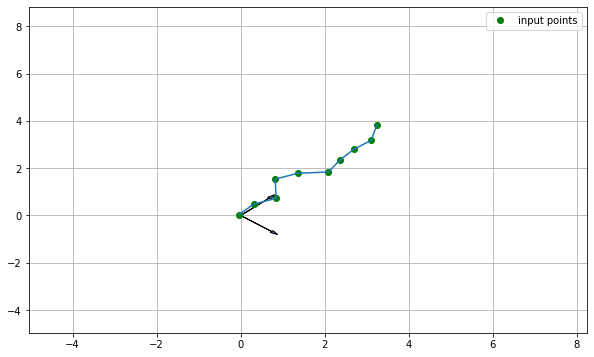

In [16]:
pts = create_sample_data(10, angle=45)
u,s,v = np.linalg.svd(pts)
print('u shape = {}, s shape = {}, v shape  = {}'.format(u.shape, s.shape, v.shape))
print('Singulare values are {} and  {}'.format(s[0], s[1]))
plot_data_with_axis(pts, v)
print('v is')
print(v)
print_eigen_data(pts.T)

## Reference links

[Dimensionality reduction medium article](https://towardsdatascience.com/https-medium-com-abdullatif-h-dimensionality-reduction-for-dummies-part-1-a8c9ec7b7e79)

[SVD medium article](https://towardsdatascience.com/svd-8c2f72e264f)

[Deep learning book notes](https://github.com/hadrienj/deepLearningBook-Notes)

In [19]:
# Good reads for svd, eigen values and eigen vectors
# http://www.netlib.org/utk/people/JackDongarra/etemplates/node40.html
# https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254
# https://en.wikipedia.org/wiki/Singular_value_decomposition
# https://www.quora.com/What-do-eigenvalues-and-eigenvectors-represent-intuitively-What-is-their-significance
# https://math.stackexchange.com/questions/243533/how-to-intuitively-understand-eigenvalue-and-eigenvector